In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [4]:
from keras.utils import to_categorical
train_lbl = to_categorical(train_lbl)
test_lbl = to_categorical(test_lbl)

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [28]:
from keras.layers import *
from keras.models import Model


input_layer = Input(shape = (784,))
hidden_layer = Dense(256, activation = "sigmoid")(input_layer)
output_layer = Dense(10, activation = "softmax")(hidden_layer)

model = Model(inputs = input_layer, outputs = output_layer)
model.compile(loss='categorical_crossentropy', optimizer ="adam", metrics=["accuracy"])

model.fit(train_img, train_lbl, validation_data = (test_img, test_lbl), epochs = 20, batch_size = 200)

Epoch 1/20
300/300 [==============================] - 3s 7ms/step - loss: 0.8224 - accuracy: 0.7700 - val_loss: 0.3145 - val_accuracy: 0.9164
Epoch 2/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2829 - accuracy: 0.9224 - val_loss: 0.2691 - val_accuracy: 0.9236
Epoch 3/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2446 - accuracy: 0.9304 - val_loss: 0.2442 - val_accuracy: 0.9298
Epoch 4/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2193 - accuracy: 0.9376 - val_loss: 0.2275 - val_accuracy: 0.9368
Epoch 5/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2123 - accuracy: 0.9405 - val_loss: 0.2218 - val_accuracy: 0.9372
Epoch 6/20
300/300 [==============================] - 2s 7ms/step - loss: 0.2010 - accuracy: 0.9436 - val_loss: 0.2066 - val_accuracy: 0.9412
Epoch 7/20
300/300 [==============================] - 2s 7ms/step - loss: 0.1869 - accuracy: 0.9452 - val_loss: 0.1995 - val_accuracy: 0.9436
Epoch 

In [29]:
score = model.evaluate(test_img, test_lbl, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])


Test loss: 0.1693
Test accuracy 0.9498


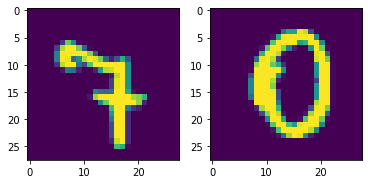

In [24]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(train_img[0].reshape(28,28))

plt.subplot(1,2,2)
plt.imshow(test_img[0].reshape(28,28))
